# Import Library and Dataset

In [2]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
dfCleaned = pd.read_csv('data_saudi_used_cars_cleaned.csv')
dfCleaned.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [4]:
# Function
def dataDescription(df):
    tempList = []
    for col in df.columns:
        tempList.append(
            [col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df)*100,2),
            df[col].nunique(),
            #list(df[col].drop_duplicates().sample(5,replace=True).values)
            list(df[col].drop_duplicates().sort_values().values)
            ]
        )

    descData = pd.DataFrame(data = tempList,
                            columns = ['Col','Data Type','Missing Value', 'Pct Missing Value','Num Unique','Unique Sample']
                            )
    display(descData)

def normalCheckShapiro(data):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")


def fillCentralTendencies(data, field):

    if len(data)<3:
        return data[field].mean()
    
    else:
        _, p_value = stats.shapiro(data[field])

        alpha = 0.05
        if p_value > alpha:
            return data[field].mean()
        else:
            return data[field].median()

# Data Understanding and Pre-Processing

## Data Understanding

**Saudi Arabia Used Cars**

**Context**


The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.


**Features**
- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.
- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car	
- Negotiable: True if the price is 0, that means it is negotiable.
- Price: Used car price.
**Saudi Arabia Used Cars**

**Context**


The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.


**Features**
- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.
- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car	
- Negotiable: True if the price is 0, that means it is negotiable.
- Price: Used car price.

In [5]:
display(f'total rows: {len(dfCleaned)}',dfCleaned.describe(), dfCleaned.describe(exclude='number'), dataDescription(dfCleaned))

,Col,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample
0,Type,object,0,0.0,347,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5..."
1,Region,object,0,0.0,27,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, A..."
2,Make,object,0,0.0,58,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadill..."
3,Gear_Type,object,0,0.0,2,"[Automatic, Manual]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full, Standard]"
6,Year,int64,0,0.0,50,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 198..."
7,Engine_Size,float64,0,0.0,71,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, ..."
8,Mileage,int64,0,0.0,1714,"[100, 104, 105, 106, 107, 108, 109, 110, 111, ..."
9,Negotiable,bool,0,0.0,2,"[False, True]"


'total rows: 5618'

,Year,Engine_Size,Mileage,Price
count,5618.000000,5618.000000,5.618000e+03,5618.000000
mean,2014.106800,3.295764,1.456360e+05,53103.701139
std,5.778751,1.514054,2.434620e+05,70181.603929
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.250000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.959142e+05,73000.000000
max,2022.000000,9.000000,4.900000e+06,850000.000000


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5618,5618,5618,5618,5618,5618,5618
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2269,1430,4871,4184,2231,3823


None

In [6]:
df = dfCleaned.copy()

## Data Pre-Processing

Pada tahap ini data akan dibersihkan dan/atau direview dengan tahapan berikut:

1. Unnecessary Field Handling
2. Advance Field Adjustment

1. Unnecessary Field Handling

`Negotiable: True if the price is 0, that means it is negotiable.`

Dari penjelasan terkait field di atas, proses learning akan terganggu karena adanya price = 0. Maka dari itu, diberlakukan drop field untuk field Negotiable==True.

In [7]:
print(f'Total row before drop: {len(df)}')
df.drop(df[df['Negotiable']==True].index,inplace=True)
print(f'Total row after drop: {len(df)}')

Total row before drop: 5618
Total row after drop: 3823


2. Advance Field Adjustment

In [8]:
df.drop(df[(df['Price']<5000)&(df['Price']!=0)].sort_values('Price',ascending=False).index,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
3750,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
3751,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
3752,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
3753,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [9]:
df[(df['Price']<5000)&(df['Price']!=0)]

#HILANGKAN DI BAWAH 5000

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


#  DEBUG LATER

In [10]:
listMakeTemp = []
listCentralTendencies = []
for i in df['Make'].unique():
    
    centralTendecies = fillCentralTendencies(df[df['Make']==i],'Price')
    #print(i)
    listMakeTemp.append(i)
    #print(centralTendecies)
    listCentralTendencies.append(centralTendecies)
makeGroup = pd.DataFrame({
    'Make' : listMakeTemp,
    'AvgGroupbyPrice' : listCentralTendencies
})

In [11]:
normalCheckShapiro(makeGroup['AvgGroupbyPrice'])

The data is not normally distributed.


In [12]:
makeGroup['MakeClass'] = np.where(makeGroup['AvgGroupbyPrice']< makeGroup['AvgGroupbyPrice'].quantile(0.33), 'Low Class',
                  np.where(makeGroup['AvgGroupbyPrice'] > makeGroup['AvgGroupbyPrice'].quantile(0.66), 'High Class', 'Medium Class'))

In [13]:
makeGroup[makeGroup['MakeClass']=='Low Class']

,Make,AvgGroupbyPrice,MakeClass
2,Kia,40000.000000,Low Class
5,Hyundai,43000.000000,Low Class
9,Nissan,38000.000000,Low Class
20,Zhengzhou,35000.000000,Low Class
26,Renault,25500.000000,Low Class
27,Suzuki,22500.000000,Low Class
28,Mercury,21428.571429,Low Class
34,BYD,28000.000000,Low Class
36,Victory Auto,31000.000000,Low Class
37,Geely,43078.947368,Low Class


# EDA

In [14]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

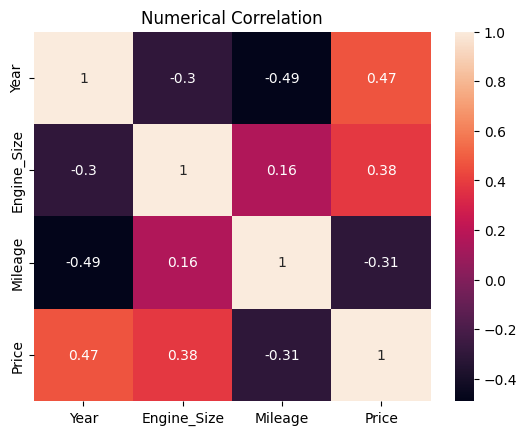

In [15]:
#Numerical Correlation

plt.figure()

sns.heatmap(
    data=df[['Year','Engine_Size', 'Mileage', 'Price']].corr('spearman'),
    annot=True
)
plt.title('Numerical Correlation')
plt.show()

Dari data di atas Engine Size dan Year memiliki tingkat korelasi Positive Medium Correlation, Sedangkan Mileage memiliki tingkat korelasi Negative Low Correlation.

# Modeling

## Import library

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

## Initial Feature Strategy 

- Type -> Binary Encoding
- Region -> **DROP**
- Make -> Binary Encoding
- Gear_Type -> One Hot Encoding
- Origin -> One Hot Encoding
- Options -> One Hot Encoding
- Year -> Robust Scaler
- Engine_Size -> Robust Scaler
- Mileage -> Robust Scaler
- Negotiable -> **DROP**
- Price -> **TARGET**

---

- Binary Encoding -> 'Type', 'Make'
- One Hot Encoding -> 'Gear_Type', 'Origin', 'Options'

- Robust Scaler -> 'Year', 'Engine_Size', 'Mileage'


- **DROP** -> 'Region', 'Negotiable'

## Data Spliting

In [17]:
# Memisahkan feature dengan target
X = df.drop(['Region','Negotiable','Price'], axis=1)
y = df['Price']

In [18]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

In [19]:
df.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

In [20]:
# Membuat Column Transformer

transformer = ColumnTransformer([
    ('binaryEncdr', ce.BinaryEncoder(), ['Type', 'Make']),
    ('oneHotEncdr', OneHotEncoder(), ['Gear_Type', 'Origin', 'Options']),
    ('robustSclr', RobustScaler(),['Year', 'Engine_Size', 'Mileage'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binaryEncdr', BinaryEncoder(),
                                 ['Type', 'Make']),
                                ('oneHotEncdr', OneHotEncoder(),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('robustSclr', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

In [21]:
# X_train_prepros = transformer.fit_transform(X_train)
# X_train_prepros = pd.DataFrame(X_train_prepros)

# feature = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + list(transformer.transformers_[2][1].get_feature_names_out())
# X_train_prepros.columns = feature

# X_train_prepros.head()

# BEST MODEL

In [22]:
# model benchmarking
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)


# Voting
voting_model = VotingRegressor(estimators=[
    ('clf1', lr),
    ('clf2', knn),
    ('clf3', dt)
])

# stacking

stacking_model = StackingRegressor(
    estimators= [
        ('clf1', lr),
        ('clf2', knn),
        ('clf3', dt)
    ],
    final_estimator= lr
)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_voting_model = TransformedTargetRegressor(voting_model, func=np.log, inverse_func=np.exp)
log_stacking_model = TransformedTargetRegressor(stacking_model, func=np.log, inverse_func=np.exp)

In [23]:
len(df)

3755

In [24]:
# kandidat model
#list_model = [lr, knn, dt, rf, xgb, voting_model, stacking_model]
list_model = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_voting_model, log_stacking_model]
name_list_model = ['logreg', 'knn', 'tree', 'random forest', 'xgb', 'voting', 'stacking']

list_all = []

list_rsme_score = []
list_rmse_mean = []
list_rmse_std = []

list_mae_score = []
list_mae_mean = []
list_mae_std = []

list_mape_score = []
list_mape_mean = []
list_mape_std = []

for model in list_model:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model)
    ])

    # RMSE
    cv_score_rmse = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv = 5,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    list_rsme_score.append(cv_score_rmse.round(2))
    list_rmse_mean.append(cv_score_rmse.round(2).mean())
    list_rmse_std.append(cv_score_rmse.round(2).std())

    # MAE
    cv_score_mae = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv = 5,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    list_mae_score.append(cv_score_mae.round(2))
    list_mae_mean.append(cv_score_mae.round(2).mean())
    list_mae_std.append(cv_score_mae.round(2).std())

    #MAPE
    cv_score_mape = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv = 5,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    list_mape_score.append(cv_score_mape.round(2))
    list_mape_mean.append(cv_score_mape.round(2).mean())
    list_mape_std.append(cv_score_mape.round(2).std())

#    list_rmse_all.append(cv_score_rmse.round(2))
    

In [25]:
df_cv = pd.DataFrame()
df_cv['Algorithm'] = name_list_model
df_cv['RMSE_mean'] = list_rmse_mean
df_cv['RMSE_std'] = list_rmse_std
df_cv['RMSE_score_all'] = list_rsme_score

df_cv['MAE_mean'] = list_mae_mean
df_cv['MAE_std'] = list_mae_std
df_cv['MAE_score_all'] = list_mae_score

df_cv['MAPE_mean'] = list_mape_mean
df_cv['MAPE_std'] = list_mape_std
df_cv['MAPE_score_all'] = list_mape_score
df_cv

,Algorithm,RMSE_mean,RMSE_std,RMSE_score_all,MAE_mean,MAE_std,MAE_score_all,MAPE_mean,MAPE_std,MAPE_score_all
0,logreg,-51682.302,4836.125816,"[-54562.79, -58046.86, -45354.01, -46771.77, -...",-26768.512,1703.034121,"[-29111.83, -26688.79, -24514.31, -25363.34, -...",-0.368,0.013266,"[-0.37, -0.36, -0.39, -0.35, -0.37]"
1,knn,-39190.676,5144.015166,"[-42018.91, -46957.56, -31456.85, -37954.33, -...",-19440.664,1779.095847,"[-20590.96, -20330.16, -15916.69, -19873.13, -...",-0.298,0.009798,"[-0.3, -0.3, -0.28, -0.31, -0.3]"
2,tree,-48424.040,5909.597741,"[-56154.76, -53481.6, -40338.3, -48606.31, -43...",-23490.894,2048.710908,"[-26755.99, -24411.94, -20589.54, -23190.34, -...",-0.334,0.014967,"[-0.36, -0.34, -0.32, -0.33, -0.32]"
3,random forest,-37019.922,5686.580080,"[-44096.71, -43774.2, -31201.07, -32895.62, -3...",-16916.888,1778.467056,"[-19813.4, -17307.32, -14262.93, -16480.65, -1...",-0.226,0.008000,"[-0.24, -0.22, -0.23, -0.22, -0.22]"
4,xgb,-31581.818,6201.853630,"[-35433.15, -41769.23, -25019.02, -29002.21, -...",-15580.078,1447.817574,"[-17158.22, -17178.76, -13366.26, -15285.5, -1...",-0.214,0.008000,"[-0.21, -0.23, -0.21, -0.21, -0.21]"
5,voting,-40135.844,5917.057981,"[-45224.58, -48282.41, -31846.85, -36699.44, -...",-19034.164,1835.571586,"[-21383.42, -19920.37, -15812.88, -18739.43, -...",-0.266,0.008000,"[-0.28, -0.27, -0.26, -0.26, -0.26]"
6,stacking,-36267.090,5880.714573,"[-41580.28, -44474.99, -28520.9, -32815.63, -3...",-17475.050,1773.574712,"[-19262.71, -18702.75, -14245.53, -17047.28, -...",-0.242,0.009798,"[-0.25, -0.25, -0.23, -0.23, -0.25]"


**APAKAH PRICE DIMASUKAN KE SCALER?**